# [Lab Session 3](fourier.ipynb)


In [416]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize

**[Task 1 (a).]()** Load the first image, resize it to (256, 256) and display it.


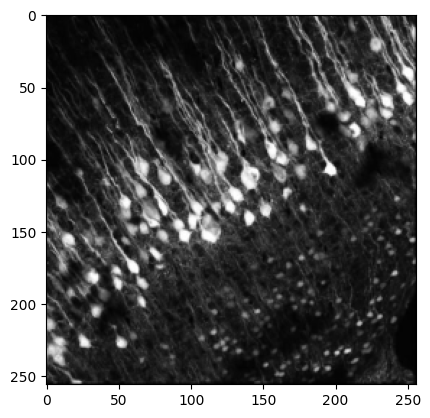

In [417]:
cell_img = plt.imread('data/cells.png')
cell_img = resize(cell_img, (256, 256))
plt.imshow(cell_img, cmap='gray')

**[Task 1 (b).]()** Apply the fast Fourier transform and check the data type of the result.


In [418]:
cell_ft = np.fft.fft2(cell_img)
cell_ft.dtype

dtype('complex128')

**[Task 1 (c).]()** Extract the phase and amplitude and display them.


In [419]:
cell_amplitude = np.abs(cell_ft)
cell_phase = np.angle(cell_ft)


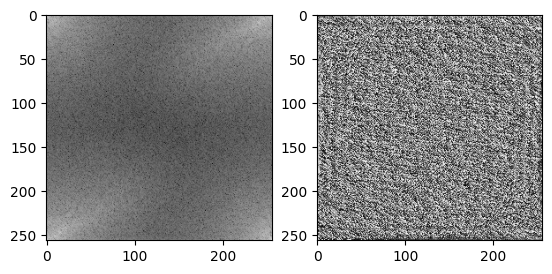

In [420]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(cell_amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(cell_phase, 'gray')

**[Task 1 (d).]()** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.


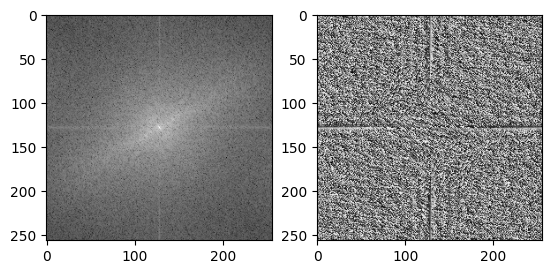

In [421]:
shifted_cell_ft = np.fft.fftshift(cell_ft)

cell_shifted_amplitude = np.abs(shifted_cell_ft)
cell_shifted_phase = np.angle(shifted_cell_ft)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(cell_shifted_amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(cell_shifted_phase, 'gray')   


**[Task 1 (e).]()** Apply the inverse FFT and display the restored image.


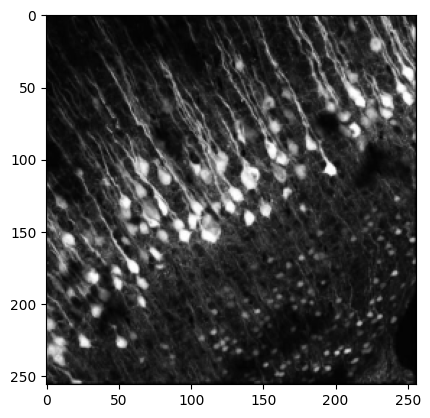

In [422]:
reconstructed_img = np.fft.ifft2(np.fft.ifftshift(shifted_cell_ft))
plt.imshow(np.abs(reconstructed_img), cmap='gray')

---


**[Task 2 (a).]()** Load the brain MR image.


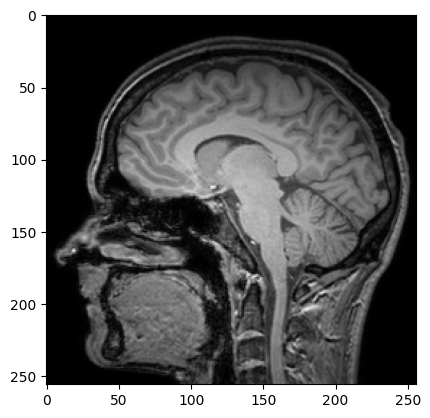

In [423]:
brain_img = plt.imread('data/brain_mri.png')
plt.imshow(brain_img, cmap='gray')

**[Task 2 (b).]()** Apply the FFT, do a shift, extract amplitude and phase.


/tmp/ipykernel_1820/4109978196.py:9: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(brain_amplitude), 'gray',)


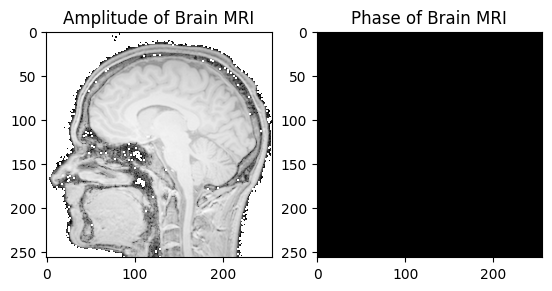

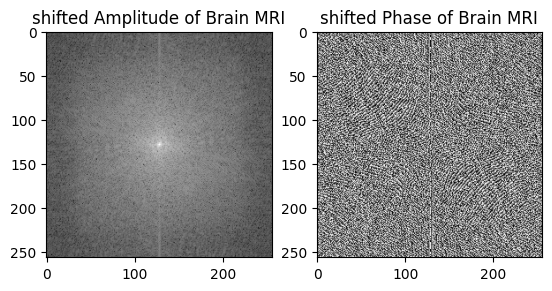

In [424]:
brain_ft = np.fft.fft2(brain_img)

brain_amplitude = np.abs(brain_img)
brain_phase = np.angle(brain_img)

plt.figure()
plt.subplot(1, 2, 1)
plt.title('Amplitude of Brain MRI')
plt.imshow(np.log(brain_amplitude), 'gray',)
plt.subplot(1, 2, 2)
plt.title('Phase of Brain MRI')
plt.imshow(brain_phase, 'gray',)


shifted_brain_ft = np.fft.fftshift(brain_ft)

brain_shifted_amplitude = np.abs(shifted_brain_ft)
brain_shifted_phase = np.angle(shifted_brain_ft)

plt.figure()
plt.subplot(1, 2, 1)
plt.title('shifted Amplitude of Brain MRI')
plt.imshow(np.log(brain_shifted_amplitude), 'gray',)
plt.subplot(1, 2, 2)
plt.title('shifted Phase of Brain MRI')
plt.imshow(brain_shifted_phase, 'gray',)

In [425]:
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)

**[Task 2 (c).]()** Merge the amplitude of the brain MR image and the phase of cell image. Do the IFFT and display the resulting image.


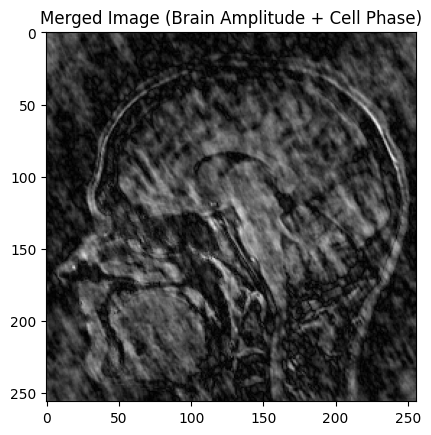

In [426]:
amplitudeBrain_phaseCell = to_complex_array(brain_shifted_amplitude, cell_shifted_phase)
shifted_amplitudeBrain_phaseCell = np.fft.ifftshift(amplitudeBrain_phaseCell)
merged_img1 = np.fft.ifft2(shifted_amplitudeBrain_phaseCell)

plt.title('Merged Image (Brain Amplitude + Cell Phase)')
plt.imshow(np.abs(merged_img), cmap='gray')






**[Task 2 (d).]()** Repeat this with the amplitude of the cells and the phase of the brain.


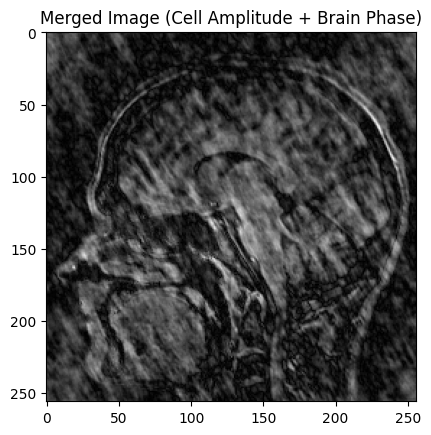

In [427]:
amplitudeCell_phaseBrain = to_complex_array(cell_shifted_amplitude, brain_shifted_phase)
shifted_amplitudeCell_phaseBrain = np.fft.ifftshift(amplitudeCell_phaseBrain)
merged_img2 = np.fft.ifft2(shifted_amplitudeCell_phaseBrain)

plt.title('Merged Image (Cell Amplitude + Brain Phase)')
plt.imshow(np.abs(merged_img2), cmap='gray')       

---


**[Task 3 (a).]()** Create a lowpass filter mask.


In [428]:
filter_window_size = 50

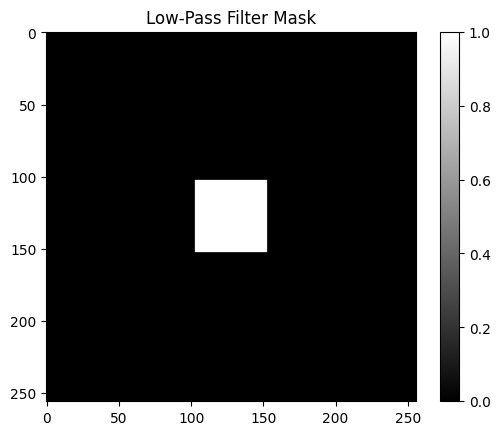

In [429]:
def low_pass_filter(shape, filter_window_size):
    mask = np.zeros(shape)
    center = [s // 2 for s in shape]
    mask[center[0] - filter_window_size//2:center[0] + filter_window_size//2, center[1] - filter_window_size//2:center[1] + filter_window_size//2] = 1
    return mask

plt.imshow(low_pass, cmap='gray')
plt.title("Low-Pass Filter Mask")
plt.colorbar()
plt.show()




**[Task 3 (b).]()** Create a highpass filter maks.


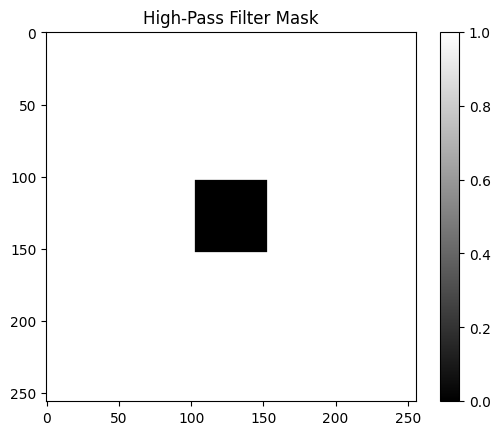

In [430]:
high_pass = 1 - low_pass

# Visualisieren des High-Pass-Filters
plt.imshow(high_pass, cmap='gray')
plt.title("High-Pass Filter Mask")
plt.colorbar()
plt.show()


**[Task 3 (c).]()** Apply the lowpass and highpass filter mask to the amplitude of the brain and display the results.


/tmp/ipykernel_1820/2103364392.py:12: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(low_passed_amplitude), cmap='gray')
/tmp/ipykernel_1820/2103364392.py:15: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(high_passed_amplitude), cmap='gray')


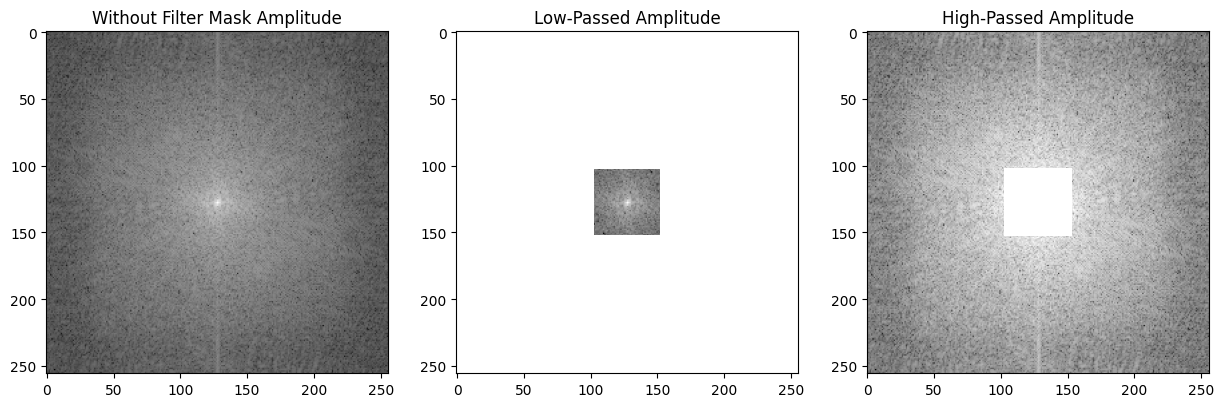

In [431]:
without_filtermask_amplitude = brain_shifted_amplitude
low_passed_amplitude = brain_shifted_amplitude * low_pass
high_passed_amplitude = brain_shifted_amplitude * high_pass

#display the three amplitude spectra
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Without Filter Mask Amplitude')
plt.imshow(np.log(without_filtermask_amplitude), cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Low-Passed Amplitude')
plt.imshow(np.log(low_passed_amplitude), cmap='gray')
plt.subplot(1, 3, 3)
plt.title('High-Passed Amplitude')
plt.imshow(np.log(high_passed_amplitude), cmap='gray')
plt.show()




**[Task 3 (d).]()** Apply the mask to the amplitude, merge the result with the phase and restore the image.


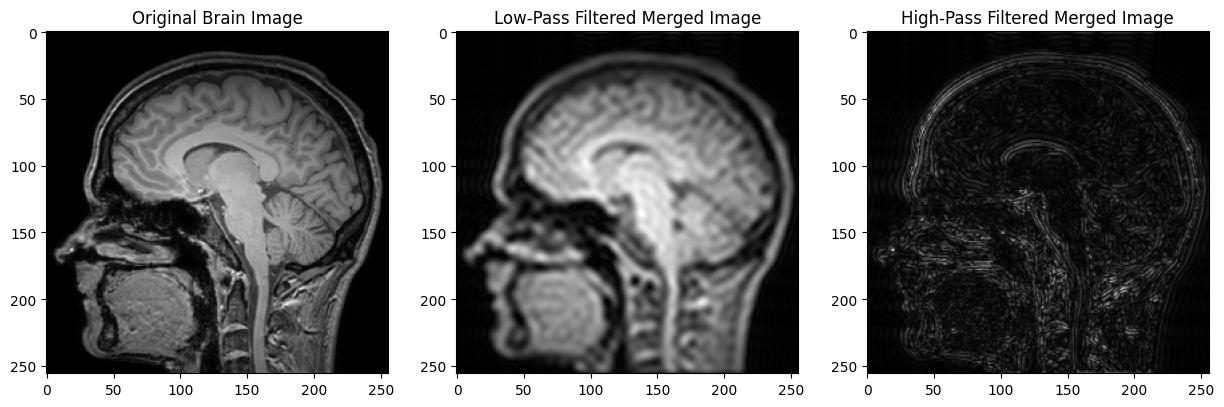

In [432]:
low_pass_merged = to_complex_array(low_passed_amplitude, brain_shifted_phase)
shifted_low_pass_merged = np.fft.ifftshift(low_pass_merged)
low_pass_img = np.fft.ifft2(shifted_low_pass_merged)

high_pass_merged = to_complex_array(high_passed_amplitude, brain_shifted_phase)
shifted_high_pass_merged = np.fft.ifftshift(high_pass_merged)
high_pass_img = np.fft.ifft2(shifted_high_pass_merged)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Brain Image')
plt.imshow(brain_img, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Low-Pass Filtered Merged Image')
plt.imshow(np.abs(low_pass_img), cmap='gray')
plt.subplot(1, 3, 3)
plt.title('High-Pass Filtered Merged Image')
plt.imshow(np.abs(high_pass_img), cmap='gray')
plt.show()


---


**[Task 4 (a).]()** Implement a function that computes the 2D-DFT.


In [433]:
def compute_2d_dft(image): # Berechnet das Bild im Frequenzraum
    M, N = image.shape # Dimensionen des Bildes
    dft = np.zeros((M, N), dtype=complex) 
    for u in range(M): # Iteration über die Frequenzkoordinaten
        for v in range(N):
            sum_val = 0 + 0j
            for x in range(M): # Iteration über die Raumkoordinaten
                for y in range(N):
                    exponent = -2j * np.pi * ((u * x / M) + (v * y / N)) # Bererchnung des Exponenten
                    sum_val += image[x, y] * np.exp(exponent)
            dft[u, v] = sum_val
    return dft
    


**[Task 4 (b).]()** Implement a function that computes the 2D-IDFT.


In [434]:
def compute_2d_idft(dft): # Berechnet das Bild im Raum
    M, N = dft.shape
    idft = np.zeros((M, N), dtype=complex)
    for x in range(M):
        for y in range(N):
            sum_val = 0 + 0j
            for u in range(M):
                for v in range(N):
                    exponent = 2j * np.pi * ((u * x / M) + (v * y / N))
                    sum_val += dft[u, v] * np.exp(exponent)
            idft[x, y] = sum_val / (M * N)
    return idft
    

Due to high computational costs, we need to resize the image.


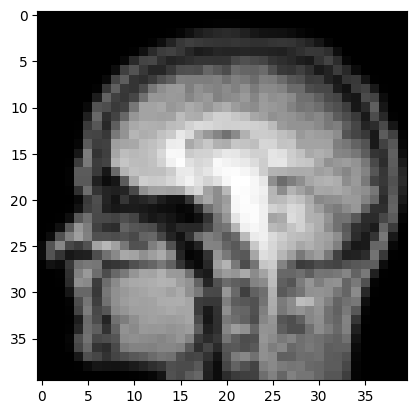

In [435]:
test_img = resize(brain_img, (40, 40))
plt.imshow(test_img, 'gray')

**[Task 4 (c).]()** Apply your DFT implementation to the image and display amplitude and phase.


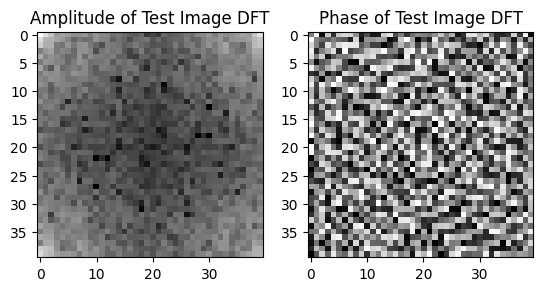

In [436]:
test_img_dft = compute_2d_dft(test_img)
test_img_amplitude = np.abs(test_img_dft)
test_img_phase = np.angle(test_img_dft)

plt.figure()
plt.subplot(1, 2, 1)
plt.title('Amplitude of Test Image DFT')
plt.imshow(np.log(test_img_amplitude), 'gray',)
plt.subplot(1, 2, 2)
plt.title('Phase of Test Image DFT')
plt.imshow(test_img_phase, 'gray',)



**[Task 4 (d).]()** Reconstruct the image using your IDFT implementation and display it.


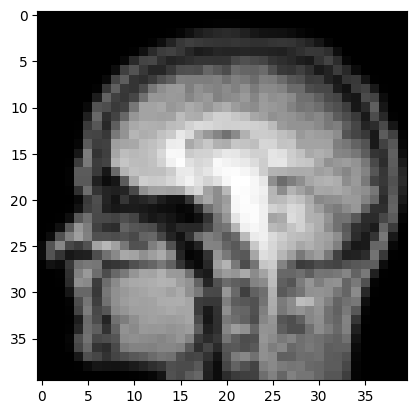

In [437]:
reconstructed_test_img = compute_2d_idft(test_img_dft)
plt.imshow(np.abs(reconstructed_test_img), 'gray')


**[Task 4 (e).]()** Compare your result to the result of numpy's FFT


In [438]:
numpy_reconstructed_img = np.fft.fft2(test_img) 
my_reconstructed_test_img = compute_2d_dft(test_img)

close = np.allclose(my_reconstructed_test_img, numpy_reconstructed_img)
print(close)




True


**[Task 4 (f).]()** Round the arrays and compare them again.


In [439]:
mean_difference = np.mean(np.abs(my_reconstructed_test_img - numpy_reconstructed_img))
print(mean_difference)

rounded_custom_dft = np.round(my_reconstructed_test_img, 5)
rounded_numpy_fft = np.round(numpy_reconstructed_img, 5)

print((rounded_custom_dft == rounded_numpy_fft).all())


1.2069960506026965e-13
True


**[Task 4 (g).]()** Compare the run times of the two algorithms (your DFT and numpy's FFT)


In [440]:
#compare run time of custom DFT and numpy FFT using %timeit
%timeit compute_2d_dft(test_img)
%timeit np.fft.fft2(test_img)



4.65 s ± 59.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
40.2 μs ± 13.1 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
